In [1]:
#include <lodepng_config_cling.h>
#include <vtkm_config_cling.h>
#include <iostream>
#include <string>
#include <VTKmXeusRender.h>
#include <adios2.h>

#pragma cling load("adios2")

In [2]:
#include <vtkm/cont/testing/MakeTestDataSet.h>
std::unique_ptr<VTKmXeusRender> renderer;
adios2::ADIOS adios(adios2::DebugON);
adios2::IO bpIO;
adios2::Engine bpReader;
bool adiosOpen = false;


In [3]:

auto open(std::string fn, std::string vn)
{
    
    if (!adiosOpen){

            /** ADIOS class factory of IO class objects, DebugON is recommended */

        /*** IO class object: settings and factory of Settings: Variables,
         * Parameters, Transports, and Execution: Engines */
        bpIO = adios.DeclareIO("ReadBP");        

        std::stringstream filename;
        filename << "/home/ybk/Projects/raytracingtherestofyourlife/build/debug/";
        filename << fn;
        /** Engine derived class, spawned to start IO operations */
        bpReader = bpIO.Open(filename.str(), adios2::Mode::Read);

        adiosOpen = true;
    }
    

    /** Write variable for buffering */
    adios2::Variable<float> bpFloats =
    bpIO.InquireVariable<float>(vn);
    
    return std::make_tuple(bpReader, bpFloats);
}

In [4]:
void queryVariables()
{
    const auto variables = bpIO.AvailableVariables();
    std::cout << variables.size() << std::endl;
    for (const auto variablePair : variables)
    {
         std::cout << "Name: " << variablePair.first;
//           for (const auto &parameter : variablePair.second)
//           {
              
//               std::cout << "\t" << parameter.first << ": " << parameter.second
//                           << "\n";
//           }
        std::cout << std::endl;
    }
}


In [5]:
void display(std::tuple<adios2::Engine,adios2::Variable<float>> tup, int nx, int ny)
{
    adios2::Engine bpReader;
    adios2::Variable<float> bpFloats;
    
    std::tie(bpReader, bpFloats) = tup;

    if (bpFloats)
    {
        
        std::vector<float> depthBuffer;
        std::vector<vtkm::Vec<vtkm::Float32,4>> useful;
        useful.resize(nx*ny);
        bpReader.Get<float>(bpFloats, depthBuffer, adios2::Mode::Sync);
  
         for (int i=0; i<useful.size(); i++)
        {
            //std::cout << x << ", ";
            auto &uf = useful[i];
            uf[0] = depthBuffer[i*4];
            uf[1] = depthBuffer[i*4+1];
            uf[2] = depthBuffer[i*4+2];
            uf[3] = 0;
            
        }
        vtkm::cont::ArrayHandle arr = vtkm::cont::make_ArrayHandle(useful);
        renderer->Display(arr, nx,ny);
    }
}

In [6]:
[](){auto try_and_err = []() {
    
    renderer = std::make_unique<VTKmXeusRender>();
    //auto tup = open("outputs", "0.2000-4.7124");
    //display("output", "output", 128, 128);
    
};try_and_err();}();

660


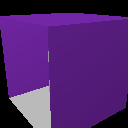

In [7]:
[](){auto try_and_err = []() {
    //std::string varname("normals");
    //std::string varname("albedo");
    std::string varname("direct");
    renderer = std::make_unique<VTKmXeusRender>();
    auto tup = open(varname, "");
    
    const auto variables = bpIO.AvailableVariables();
    std::cout << variables.size() << std::endl;
    for (const auto variablePair : variables)
    {
        auto tup = open(varname, variablePair.first);
        display(tup, 128, 128);
    }
    
};try_and_err();}();